# WEEK 2

Anthony Manikhouth M1 LSI2

# Bike Rental Prediction

In [1]:
#First, let's import the nesseacary labraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

So here we are just displaying the shape (rows*cols) and the head (first rows) of the read csv

In [2]:
df=pd.read_csv("Bike Rental UCI dataset.csv")
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())

the data frame has a shape : (17379, 13)
let's print the first five rows 
    season  yr  mnth  hr  holiday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0           0           1  0.24  0.81   
1       1   0     1   1        0           0           1  0.22  0.80   
2       1   0     1   2        0           0           1  0.22  0.80   
3       1   0     1   3        0           0           1  0.24  0.75   
4       1   0     1   4        0           0           1  0.24  0.75   

   windspeed dayOfWeek  days  demand  
0        0.0       Sat     0      16  
1        0.0       Sat     0      40  
2        0.0       Sat     0      32  
3        0.0       Sat     0      13  
4        0.0       Sat     0       1  


Now we're just displaying some informatiosn and a description of the dataset

In [3]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   hum         17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  dayOfWeek   17379 non-null  object 
 11  days        17379 non-null  int64  
 12  demand      17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB
None
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775    

Looks like the dataframe has 17379 rows and 13 columns. There is one columns of type object (text) <br>
temp, hum, windspeed are rescaled to 0-1 range

## 2. Visualize the data

To visualize the data, we're going to display it through matplot which is a great plugin to create "plots", graphical representation of datasets.
So we're going to iterate through each one of these columns (4 actually) to create some interesting data about each detail related to the rental of the bikes.

'Done'

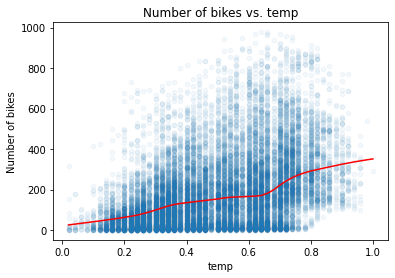

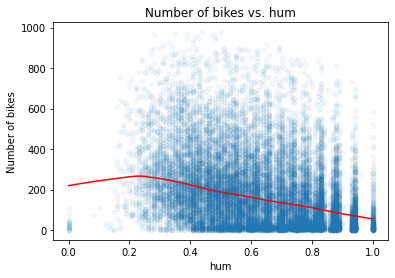

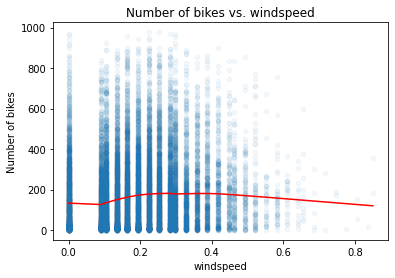

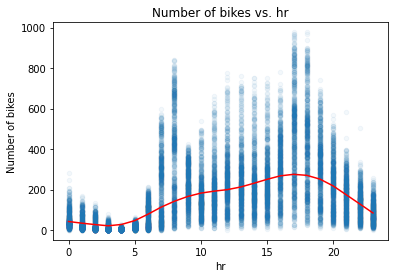

In [4]:
# make sure that the visualizations are printed in the notebook
%matplotlib inline   

def bike_scatter(df, cols):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    ## Loop over the columns and create the scatter plots
    for col in cols:
        ## first compute a lowess fit to the data
        los = lw.lowess(df['demand'], df[col], frac = 0.3)
    
        ## Now make the plots
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.plot(kind = 'scatter', x = col, y = 'demand', ax = ax, alpha = 0.05)
        plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'

num_cols = ["temp", "hum", "windspeed", "hr"] 
bike_scatter(df, num_cols)

As we display this scatter plot, we get some interesting data about how each one of these parameters influenced the rental of the bikes. Scatter plots helps us to observe relationship between different variables.

Here we're going to use another type of display, boxplot. It allows us to observe the distribution of the data in quartiles.

'Done'

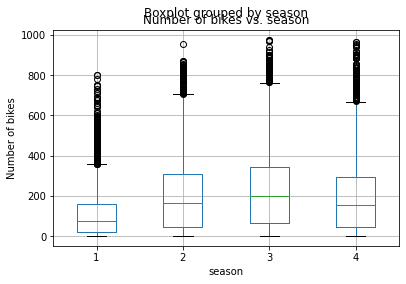

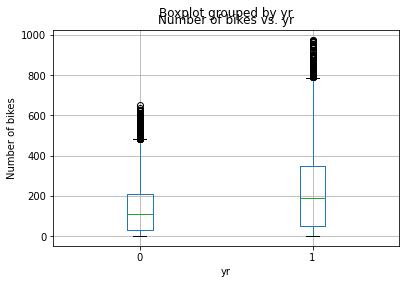

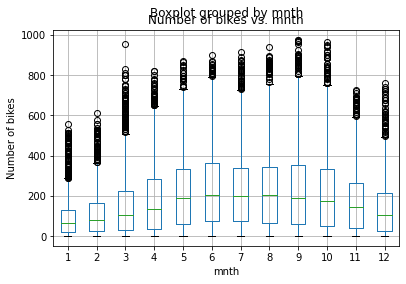

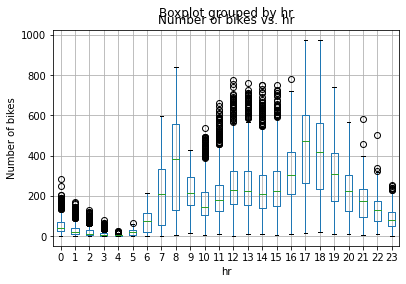

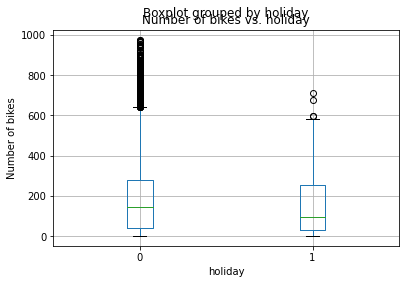

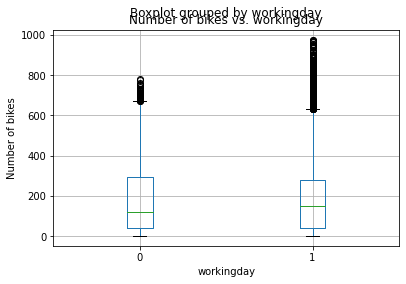

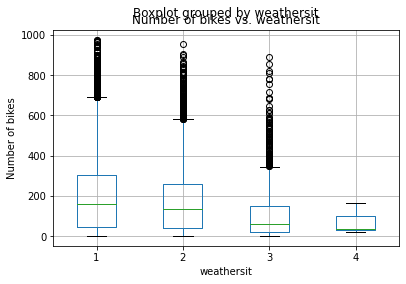

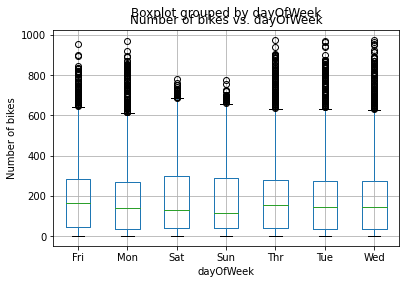

In [5]:
def bike_box(df, cols):
    import matplotlib.pyplot as plt
    
    ## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = 'demand', by = col, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday','workingday', 'weathersit', 'dayOfWeek']
bike_box(df, cat_cols)

Here we're going to use a line plot. In our context it is a good choice to evaluate data in duration of time (days here)

'Done'

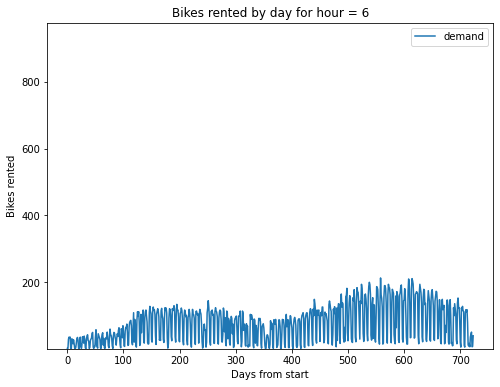

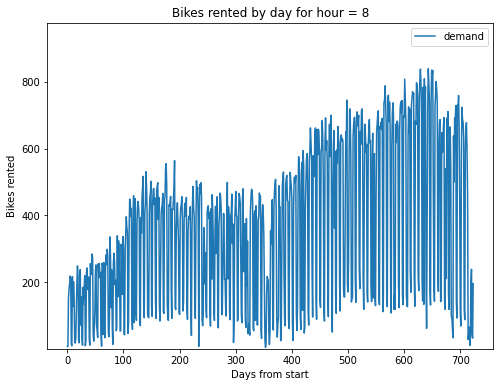

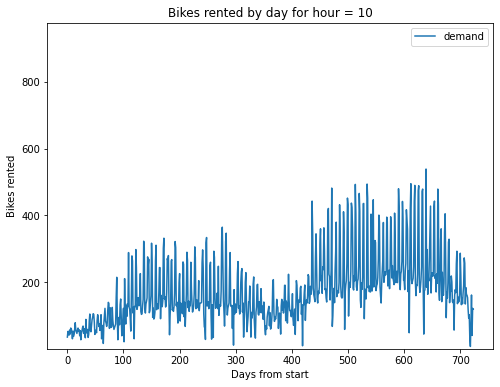

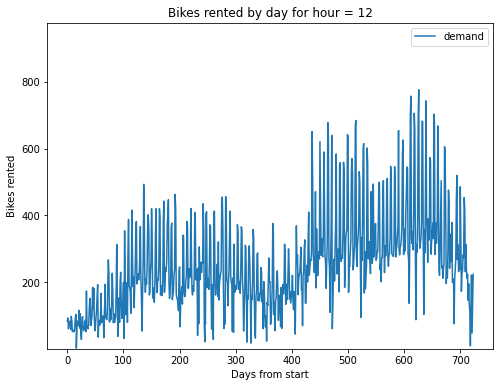

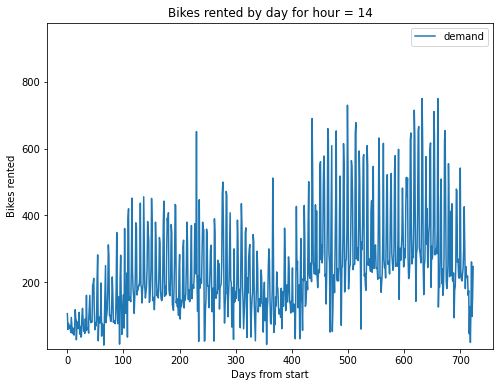

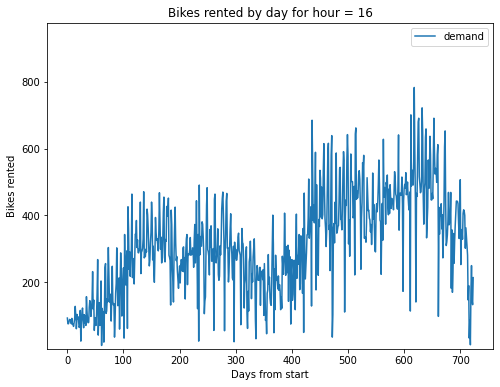

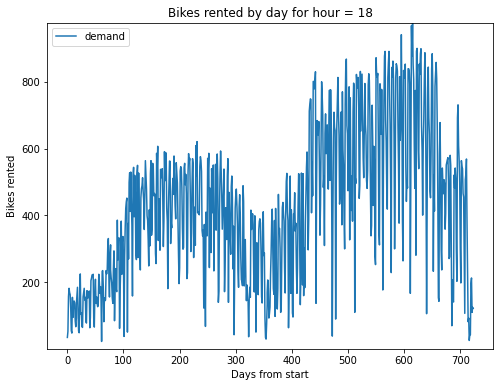

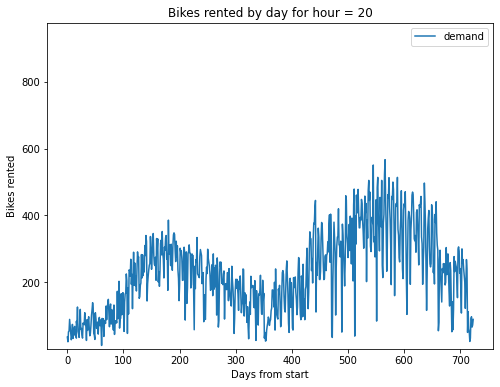

In [6]:
def bike_series(df, tms):
    import matplotlib.pyplot as plt
        
    lims = (min(df.demand), max(df.demand))   
    for t in tms:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == t].plot(kind = 'line', x = 'days', y = 'demand',
                            ylim = lims, ax = ax)    
        plt.xlabel("Days from start")
        plt.ylabel("Bikes rented")
        plt.title("Bikes rented by day for hour = " + str(t))
    return 'Done'
plt_times = [6, 8, 10, 12, 14, 16, 18, 20]
bike_series(df, plt_times)

Another basic type of plot, an histogram shows the distribution of the dataset

'Done'

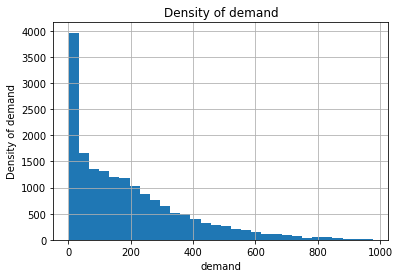

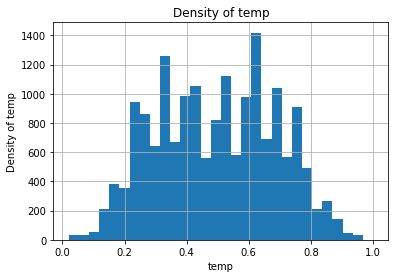

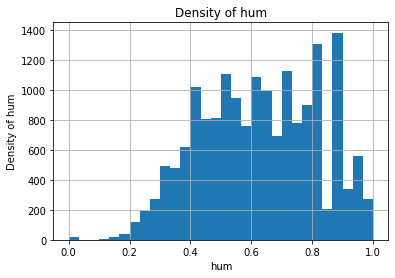

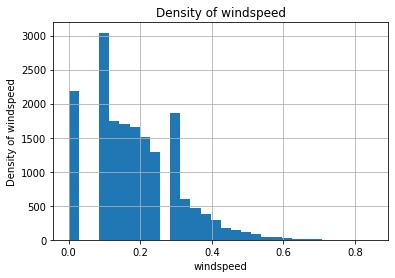

In [7]:
def bike_hist(df, cols):    
    import matplotlib.pyplot as plt
    
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
    return 'Done'
hist_cols = ["demand", "temp", "hum", "windspeed"]
bike_hist(df, hist_cols)

## 3. Building the Model

In [8]:
from sklearn.model_selection import train_test_split
# custom function to split a dataframe on the column "days"
def split_on_days(X, y, test_size = 0.3):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test 

In [9]:
y = df['demand']
X = df.iloc[:,:-1]
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical

X_train, X_test, y_train, y_test = split_on_days(X, y, test_size=0.3)

print ("the max day in X_train is : {}".format(max(X_train.dayOfWeek)))
print ("the min day in X_test is: %d" %min(X_test.dayOfWeek))
print ("*"*50)
print('X_train length = %d,  y_train length = %d' %(len(X_train), len(y_train)))
print('X_test length = %d,  y_test length = %d' %(len(X_test), len(y_test)))

the max day in X_train is : 6
the min day in X_test is: 0
**************************************************
X_train length = 12165,  y_train length = 12165
X_test length = 5214,  y_test length = 5214


In [10]:
from sklearn.linear_model import LinearRegression  # : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print('train score =' , train_score)
print('test score =', test_score)

train score = 0.39304764747392607
test score = {} 0.37376425461151297


Looks like the model is not fitting well the data, since R2 is small. 
There might also be a sign of overfitting since there is a little difference between training and test r-square. Let's now print the model's parameters

In [14]:
print('Coeffecients = ', reg.coef_[0])
print('Intecept = ', reg.intercept_)

Coeffecients =  19.40475528672238
Intecept =  -9.777475634820433


Let's print some other metrics

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))

mse = 20339.682075145018, rmse = 142.6172572837699 
mae = 106.47183820130125 r2 = 0.37376425461151297


## 4. Visualize the model's performance

'Done'

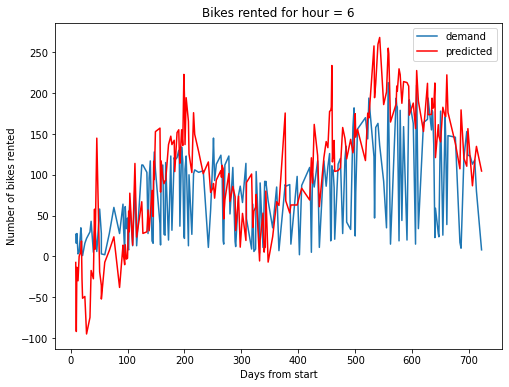

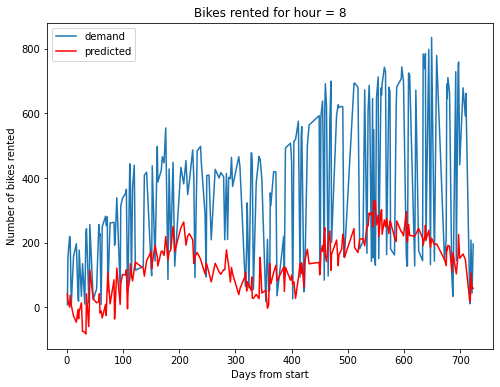

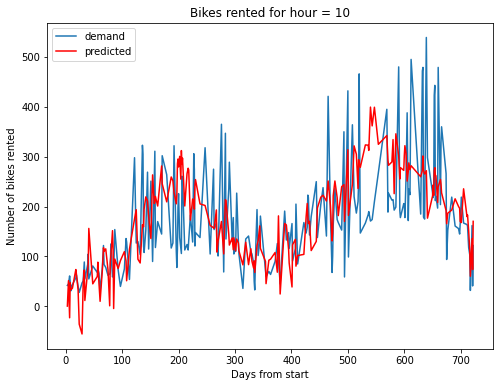

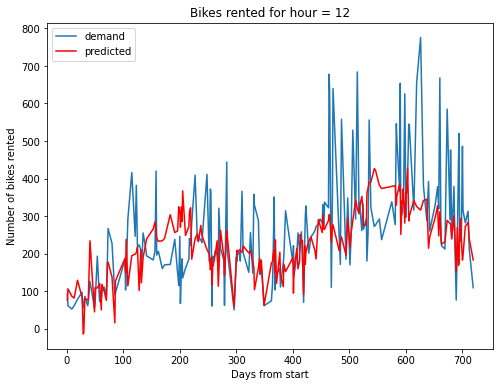

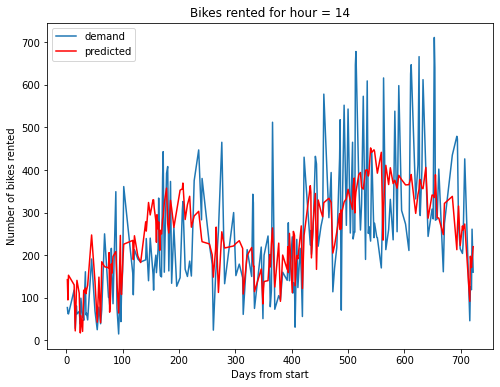

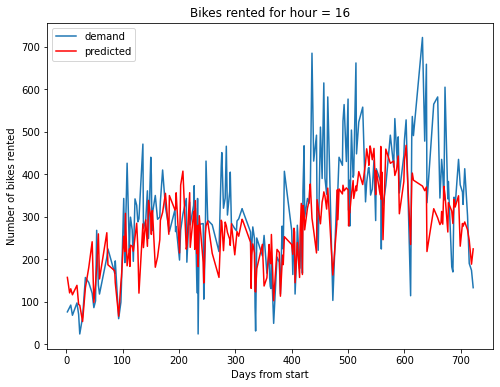

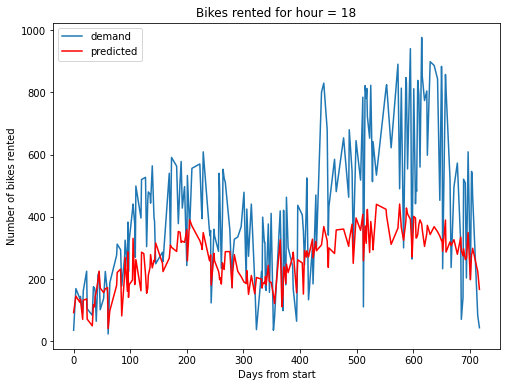

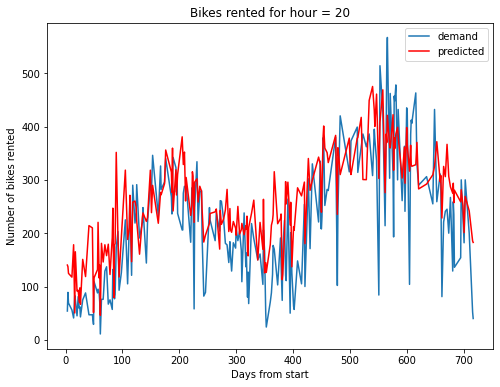

In [18]:
def ts_bikes(df, times):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    for tm in times:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'demand', ax = ax)          
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'predicted', color = 'red', ax = ax)                                    
        plt.xlabel("Days from start")
        plt.ylabel("Number of bikes rented")
        plt.title("Bikes rented for hour = " + str(tm))
        #fig.savefig('ts_' + str(tm) + '.png')
    return 'Done'

X_test['predicted']=y_pred
X_test['demand']=y_test
#X_test.sort('days',inplace=True)
X_test.sort_values('days', inplace=True)
ts_bikes(X_test, plt_times)

Looks like the model is not doing a great job in fitting the demand for hours 8 and 18. Let's plot the reisuals for all hours

'Done'

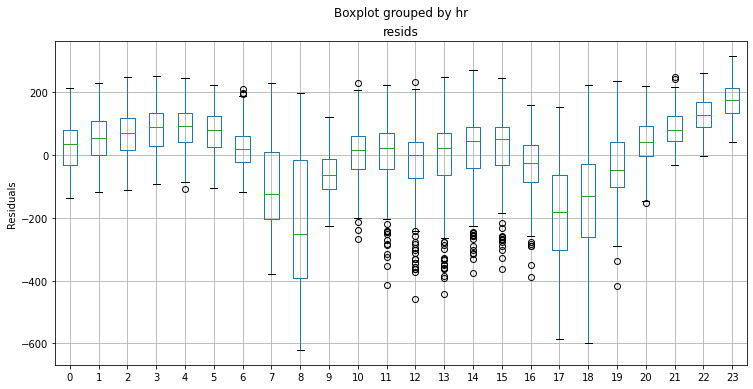

In [19]:
def resids(df):
    df['resids'] = df.predicted - df.demand
    return df        
        
def box_resids(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    
    df = resids(df)
    
    fig = plt.figure(figsize=(12, 6))
    fig.clf()
    ax = fig.gca()  
    df.boxplot(column = ['resids'], by = ['hr'], ax = ax)   
    plt.xlabel('')
    plt.ylabel('Residuals')
    fig.savefig('boxes' + '.png')
    return 'Done'
box_resids(X_test)

for hours 7,8, 17, 18 most of the residuals are negative, so our model is under-predecting the demand

Plot the histogram of residuals. A good model has residuals centered around zero

<AxesSubplot:>

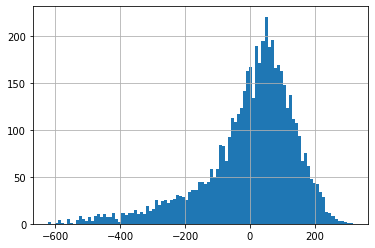

In [20]:
resids(X_test)['resids'].hist(bins=100)

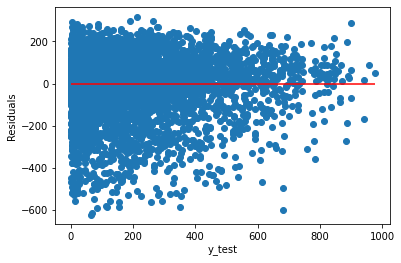

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, resids(X_test)['resids'])
plt.hlines(y=0, xmin=0,xmax=y_test.max(), color='r')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.show()

As we've seen before, there might be a sign of overfitting, so regularization might help improving the model's performance on test set. Let's try Ridge and Lasso to confirm that

In [36]:
# Split the data again into X_train, X_test, y_train, y_test 
y = df['demand']
X = df.iloc[:,:-1]
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical

X_train, X_test, y_train, y_test = split_on_days(X, y, test_size=0.3)

# Import Ridge : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
from sklearn.linear_model import Ridge

# import Lasso : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
from sklearn.linear_model import Lasso

# try different values for alpha = [0.001, 0.01, 0.1, 1, 10, 100,1000,1000]

#clf = Ridge(alpha=0.001) # 0.38818135147820687 # 0.38576754702272176 # 20.054215865707064
#clf = Ridge(alpha=0.01)
#clf = Ridge(alpha=0.1)
#clf = Ridge(alpha=1)
#clf = Ridge(alpha=10) # 0.3838355104455412 # 0.3955129922169416 # 20.410643020359277
clf = Ridge(alpha=100) # 0.3859644175381485 # 0.38065182848845147 # 22.758076764088116
#clf = Ridge(alpha=1000)
#clf = Ridge(alpha=10000) # 0.26820063950842177 # 0.28061227822561385 # 15.107536192898129
base_ridge = clf.fit(X, y)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('train score =', train_score)
print('test score = ', test_score) 
print('Coeffecients = ', clf.coef_[0])

clf = Lasso(alpha=0.001) # 0.38192143659895816 # 0.4004149361014454
#clf = Lasso(alpha=0.01)
#clf = Lasso(alpha=0.1)
#clf = Lasso(alpha=1)
#clf = Lasso(alpha=10) # 0.26193884217146735 # 0.2526279712062838
#clf = Lasso(alpha=100) # 0.2260070193104552 # 0.23080540118016846
#clf = Lasso(alpha=1000)
#clf = Lasso(alpha=10000) # 0.007730493320945442 # 0.007965339021278495

base_ridge = clf.fit(X, y)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('train score =', train_score)
print('test score = ', test_score) 

train score = 0.37910183740465864
test score =  0.39713933738613283
Coeffecients =  22.758076764088116
train score = 0.38192143659895816
test score =  0.4004149361014454


You can see that regularization is not bringing improvment to the model. The performance is decreasing with large values of alpha. The main difference is that with Lasso, parameters are shrinked to zero

Another way of improving the model is by adding extra features (complexity). As we've seen before, the model has poor performance for some hours. Let's add Boolean features indicating the model each hour. These are also called dummy variables.

In [37]:
for hour in df.hr.unique():
    col='is_'+str(hour)
    df[col]= (df.hr == hour).astype("int")
print (df.columns)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'dayOfWeek', 'days', 'demand', 'is_0',
       'is_1', 'is_2', 'is_3', 'is_4', 'is_5', 'is_6', 'is_7', 'is_8', 'is_9',
       'is_10', 'is_11', 'is_12', 'is_13', 'is_14', 'is_15', 'is_16', 'is_17',
       'is_18', 'is_19', 'is_20', 'is_21', 'is_22', 'is_23'],
      dtype='object')


In [38]:
df[["hr"] + ["is_" + str(i) for i in range(24)]].head(24)

,hr,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,...,is_14,is_15,is_16,is_17,is_18,is_19,is_20,is_21,is_22,is_23
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Re-train your model

In [39]:
y = df['demand']
X = df.iloc[:,:-1]
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes
X_train, X_test, y_train, y_test = split_on_days(X, y, test_size=0.3)

base_ridge = clf.fit(X, y)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('train score =', train_score) # 0.9999998158213385
print('test score = ', test_score)  # 0.9999998190486281

train score = 0.9999998158213385
test score =  0.9999998190486281


In [44]:
y_pred = reg.predict(X_test)  # predict the demand for X_test
X_test['predicted']=y_pred
X_test['demand']=y_test
ts_bikes(X_test, plt_times)

ValueError: X has 36 features, but LinearRegression is expecting 12 features as input.

Visualize the residuals

In [41]:
box_resids(X_test)

AttributeError: 'DataFrame' object has no attribute 'predicted'

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, resids(X_test)['resids'])
plt.hlines(y=0, xmin=0,xmax=y_test.max(), color='r')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.show()